In [56]:
import matplotlib.pyplot as plt
import numpy as np
from eigenface.yalefaces import YaleFaceDb
np.set_printoptions(precision=2, suppress=True, formatter={'float': '{: 0.2f}'.format}, linewidth=1000)

In [61]:
def gen_images():
    images = np.empty(shape=(3,4,4))
    images[0,:,:] = np.array([[1,2,3,4],[5,6,7,8],[5,6,7,8],[5,6,7,8]])
    images[1,:,:] = np.array([[2,3,4,5],[6,7,8,9],[5,6,7,8],[5,6,7,8]])
    images[2,:,:] = np.array([[0,2,4,6],[3,5,7,9],[5,6,7,8],[5,6,7,8]])
    return images

def convert_matrix_presentation(images): 
    vector2d = []
    for image in images:
        vector = image.flatten()
        vector2d.append(vector)
    return np.array(vector2d)

def calculate_eigen_vectors(vector_matrix):
    mean_vector = vector_matrix.mean(axis=0)
    vector_mean_matrix = vector_matrix[:,:] - mean_vector
    covariance_matrix = np.matmul(vector_mean_matrix,vector_mean_matrix.T) # vector_matrix: [M x N^2], [N^2 x M]
    u, eigen_value, eigen_vector_vi = np.linalg.svd(covariance_matrix)     # eigen_value: 1 x M, eigen_vector_vi: M x M
    # vector_mean_matrix.T (N^2 x M) x eigen_vector_vi.T (M x 1) = N^2 x 1
    # M eigen vectors with high values
    eigen_vector_ui = np.matmul(vector_mean_matrix.T, eigen_vector_vi[:,:].T).T   
    # normalize eigen vectors
    norms = np.linalg.norm(eigen_vector_ui, axis=1)   # N^2 x 1
    norm_ui = np.divide(eigen_vector_ui.T, norms).T   # 1 x N^2
    return (vector_mean_matrix, mean_vector, eigen_value, norm_ui) # M x N^2, 1 x N^2

def calculate_eigen_faces(images):
    vector_matrix = convert_matrix_presentation(images)
    (vector_mean_matrix, mean_vector, eigen_value, norm_ui) = calculate_eigen_vectors(vector_matrix)
    eigen_faces = norm_ui.reshape(images.shape)
    mean_images = mean_vector.reshape(images.shape[1], images.shape[1], 1)
    return (mean_images, eigen_faces), (vector_mean_matrix, mean_vector, eigen_value, norm_ui)

In [62]:
# images = gen_images().astype(dtype=np.float)
db = YaleFaceDb()
images = db.get_list().astype(dtype=np.float)
labels = db.get_label()

In [63]:
(mean_images, eigen_faces),(_,_,_,_) = calculate_eigen_faces(images)

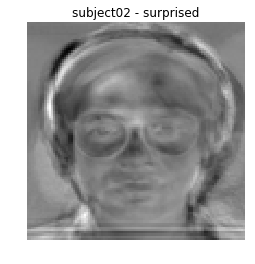

In [64]:
cnt = 20
plt.imshow(eigen_faces[cnt,:,:,0].astype(dtype=np.float), cmap='gray')
plt.title('%s - %s'%(labels[cnt,0],labels[cnt,1]))
plt.axis('off')
plt.show()

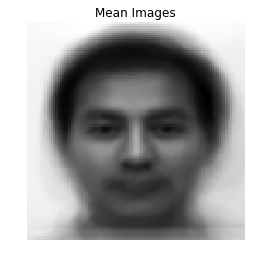

In [65]:
plt.imshow(mean_images[:,:,0], cmap='gray')
plt.title('Mean Images')
plt.axis('off')
plt.show()